#Sea Level Predictor

The project consists of analyzing a dataset of the global average sea level change since 1880. We will use the data to predict the sea level change through the year 2050.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

With Pandas, import the dataset from 'epa_sea_level.csv'.

In [43]:
df = pd.read_csv('epa-sea-level.csv')

In [72]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


I used Matplotlib to create a scatter plot.

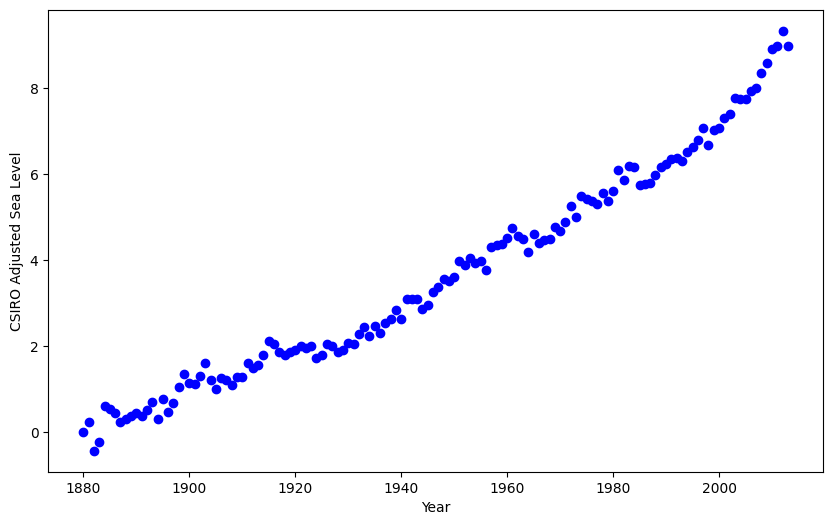

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', label='Data')
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.show()

The line of best fit

In [51]:
slope, intercept, _, _, _  = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

In [53]:
print(slope, intercept, _, _, _ )

0.06304458401213482 -119.06594196773983 0.0009692118713287152 0.0009692118713287152 0.0009692118713287152


In [50]:
x_values = range(1880, 2051)
y_values = slope * x_values + intercept

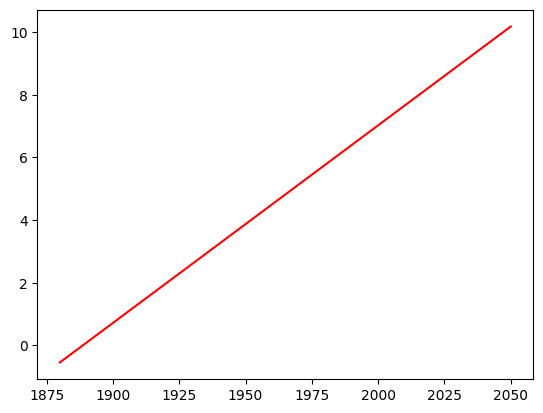

In [49]:
plt.plot(x_values, y_values, color='red', label='Line of Best Fit (1880 - 2050)')
plt.show()

New best-fit line using only the data from the year 2000 onwards

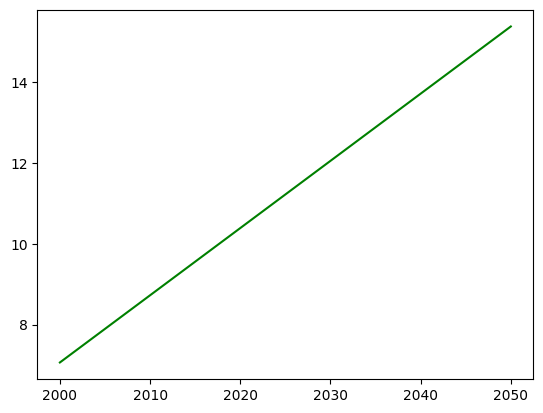

In [57]:
recent_years_data = df[df['Year'] >= 2000]
slope_recent, intercept_recent, _, _, _ = linregress(recent_years_data['Year'], recent_years_data['CSIRO Adjusted Sea Level'])
x_values_recent = range(2000, 2051)  
y_values_recent = slope_recent * x_values_recent + intercept_recent
plt.plot(x_values_recent, y_values_recent, color='green', label='Line of Best Fit (2000 - Recent)')
plt.show()

The line is also extended to pass through the year 2050 to predict the sea level rise in 2050 if the rate of increase continues as it has since the year 2000.

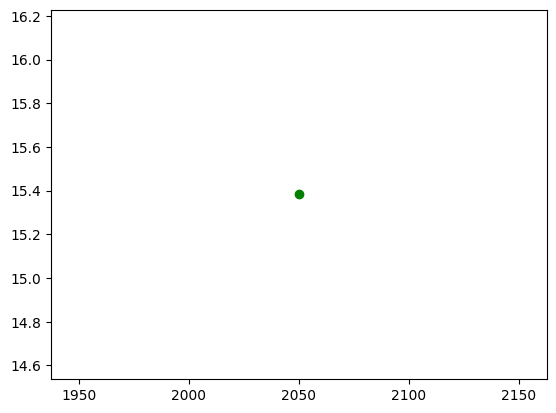

In [69]:
sea_level_2050_recent = slope_recent * 2050 + intercept_recent
plt.scatter(2050, sea_level_2050_recent, color='green', label='Prediction for 2050 (2000 - Recent)')
plt.show()

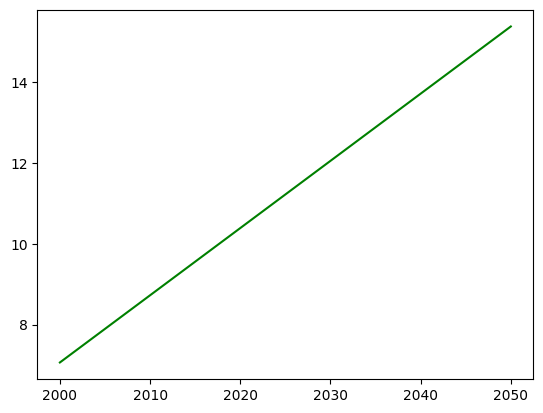

In [61]:
recent_years_data = df[df['Year'] >= 2000]
slope_recent, intercept_recent, _, _, _ = linregress(recent_years_data['Year'], recent_years_data['CSIRO Adjusted Sea Level'])
x_values_recent = range(2000, 2051) 
y_values_recent = slope_recent * x_values_recent + intercept_recent
plt.plot(x_values_recent, y_values_recent, color='green', label='Line of Best Fit (2000 - Recent)')
plt.show()

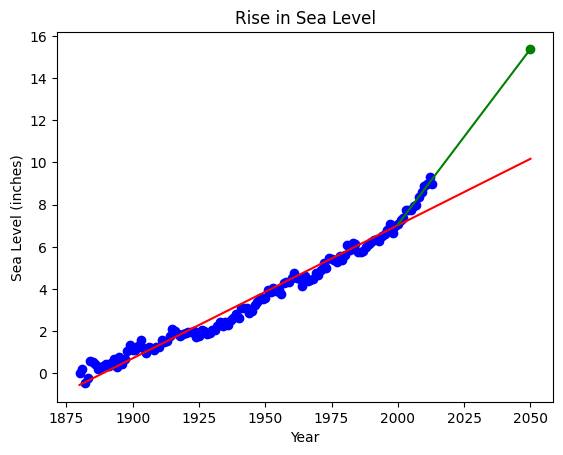

In [75]:
sea_level_2050_recent = slope_recent * 2050 + intercept_recent
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', label='Data')
plt.plot(x_values, y_values, color='red', label='Line of Best Fit (1880 - 2050)')
plt.plot(x_values_recent, y_values_recent, color='green', label='Line of Best Fit (2000 - Recent)')
plt.scatter(2050, sea_level_2050_recent, color='green', label='Prediction for 2050 (2000 - Recent)')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.show()